In [19]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150

# Loading in the data

## Betting Data

In [2]:
betting_data_2018 = Path('./data/2018.xlsx')
original_betting_data_2018_df = pd.read_excel(betting_data_2018)
original_betting_data_2018_df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2017-12-31,ATP250,Outdoor,Hard,1st Round,3,Dolgopolov O.,...,2.10,1.65,2.20,1.67,2.24,1.71,2.29,1.77,2.17,1.68
1,1,Brisbane,Brisbane International,2017-12-31,ATP250,Outdoor,Hard,1st Round,3,De Minaur A.,...,2.80,1.38,2.75,1.44,3.14,1.41,3.25,1.44,2.96,1.39
2,1,Brisbane,Brisbane International,2018-01-01,ATP250,Outdoor,Hard,1st Round,3,Harrison R.,...,1.62,2.15,1.67,2.20,1.66,2.35,1.75,2.35,1.67,2.17
3,1,Brisbane,Brisbane International,2018-01-01,ATP250,Outdoor,Hard,1st Round,3,Ebden M.,...,2.35,1.53,2.37,1.57,2.38,1.64,2.52,1.65,2.37,1.58
4,1,Brisbane,Brisbane International,2018-01-01,ATP250,Outdoor,Hard,1st Round,3,Zverev M.,...,1.47,2.50,1.57,2.37,1.44,3.00,1.57,3.00,1.44,2.73


## Match Data

In [3]:
match_data_2018 = Path('./data/atp_matches_2018.csv')
original_match_data_2018_df = pd.read_csv(match_data_2018)
original_match_data_2018_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2018-M020,Brisbane,Hard,32,A,20180101,300,106401,3.0,NaN,...,5.0,8.0,3.0,58.0,32.0,22.0,12.0,9.0,4.0,7.0
1,2018-M020,Brisbane,Hard,32,A,20180101,299,106401,3.0,NaN,...,2.0,5.0,6.0,74.0,44.0,32.0,16.0,13.0,3.0,6.0
2,2018-M020,Brisbane,Hard,32,A,20180101,298,105992,NaN,NaN,...,6.0,9.0,5.0,94.0,62.0,49.0,16.0,16.0,0.0,3.0
3,2018-M020,Brisbane,Hard,32,A,20180101,297,105777,1.0,NaN,...,2.0,6.0,1.0,89.0,53.0,39.0,23.0,15.0,4.0,6.0
4,2018-M020,Brisbane,Hard,32,A,20180101,296,106401,3.0,NaN,...,3.0,6.0,3.0,75.0,41.0,33.0,16.0,13.0,2.0,4.0


# Exploring and Understanding the Data

Now that we have the data loaded, we have to figure out what information this data gives us (i.e. what the columns represent).

## Betting data

Let's look at the [betting data documentation](http://www.tennis-data.co.uk/notes.txt) (shown below) to see what we can gather. The data includes betting odds for the matches by different betting entities, but we will ignore those for now and just focus on the match data.

<img src="./data/data_legend.png">

To get a better understanding of the data, let's take a look at the numerical summary pandas gives us:

In [4]:
original_betting_data_2018_df.describe()

,ATP,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
count,2637.000000,2637.000000,2637.000000,2636.000000,2637.000000,2636.000000,2622.000000,2623.000000,2607.000000,2607.000000,...,2618.000000,2618.00000,2162.000000,2162.000000,2617.000000,2617.000000,2636.000000,2636.000000,2636.000000,2636.000000
mean,33.760334,3.384528,60.269245,87.683991,1732.301100,1126.762519,5.802441,4.208921,5.764480,4.030687,...,1.827762,2.96500,1.855148,3.045023,1.926335,3.463091,1.991089,3.677830,1.863961,3.183194
std,18.554584,0.788308,73.188987,113.492047,1815.483268,1062.844898,1.261901,1.799389,1.279958,1.834431,...,0.895751,2.13104,0.873949,2.529572,1.065434,3.414277,1.150385,3.925328,0.942274,2.713412
min,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.010000,1.02000,1.000000,1.040000,1.010000,1.030000,1.020000,1.050000,1.010000,1.030000
25%,19.000000,3.000000,19.000000,35.000000,694.000000,559.750000,6.000000,3.000000,6.000000,3.000000,...,1.300000,1.69250,1.330000,1.730000,1.340000,1.770000,1.370000,1.810000,1.320000,1.720000
50%,33.000000,3.000000,46.000000,64.000000,1051.000000,835.500000,6.000000,4.000000,6.000000,4.000000,...,1.570000,2.30000,1.610000,2.250000,1.620000,2.460000,1.670000,2.550000,1.590000,2.360000
75%,50.000000,3.000000,80.000000,102.000000,1905.000000,1285.000000,6.000000,6.000000,6.000000,6.000000,...,2.100000,3.35000,2.100000,3.400000,2.190000,3.600000,2.260000,3.720000,2.120000,3.390000
max,67.000000,5.000000,1821.000000,1821.000000,10600.000000,10600.000000,7.000000,7.000000,7.000000,7.000000,...,17.000000,20.00000,11.000000,41.000000,18.030000,33.900000,20.000000,52.250000,14.070000,25.410000


This table tells us a few things:
- There are 67 tournaments represented in this dataset (the max of `ATP` is 67)
- There may be missing values in `LRank` and in the `W1` through `L5` columns (the `count` of these columns is less than the maximum value of `count` for any column)


## Match data

There is no official documentation for the match data, but the columns titles are fairly self-explanatory. Let's look at the pandas numerical summary for the match data.

In [5]:
original_match_data_2018_df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,winner_rank_points,loser_id,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
count,2494.000000,2.494000e+03,2494.000000,2494.000000,948.000000,1660.000000,2494.000000,2487.000000,2487.000000,2494.000000,...,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000
mean,61.589415,2.018048e+07,231.905774,109729.885726,8.126582,186.912048,27.628326,88.418979,1603.599920,111484.771451,...,5.129802,5.594015,3.572988,84.093409,50.841892,34.318237,15.439143,11.650222,4.863728,8.677719
std,44.142876,2.485647e+02,91.467684,14857.070038,7.624144,7.986847,4.630301,163.833733,1793.900975,18561.077638,...,3.992374,5.435946,2.606244,30.258697,19.844166,15.126202,7.247338,5.223811,3.332023,4.233006
min,4.000000,2.018010e+07,1.000000,100644.000000,1.000000,163.000000,14.926762,1.000000,1.000000,100644.000000,...,0.000000,0.000000,0.000000,11.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,2.018022e+07,200.000000,104898.000000,3.000000,183.000000,23.986995,21.000000,638.000000,104925.000000,...,2.000000,2.000000,2.000000,61.000000,36.000000,24.000000,10.000000,9.000000,2.000000,6.000000
50%,32.000000,2.018043e+07,275.000000,105526.000000,6.000000,185.000000,27.994524,51.000000,981.000000,105583.000000,...,4.000000,4.000000,3.000000,79.000000,48.000000,32.000000,14.000000,11.000000,4.000000,8.000000
75%,128.000000,2.018072e+07,289.000000,106298.000000,10.000000,190.000000,31.102669,91.000000,1757.000000,106378.000000,...,7.000000,8.000000,5.000000,101.000000,62.000000,43.000000,20.000000,15.000000,7.000000,11.000000
max,128.000000,2.018092e+07,701.000000,208029.000000,32.000000,208.000000,39.378508,1821.000000,10600.000000,207973.000000,...,25.000000,61.000000,18.000000,291.000000,218.000000,171.000000,50.000000,50.000000,22.000000,28.000000


### Missing values

From the previous table, we can see there are a lot of missing values in the data (the `count` of some columns is less than the maximum value of `count` for all columns). Let's examine these records (matches).

In [6]:
original_match_data_2018_df[original_match_data_2018_df.isnull().any(axis=1)] # display all rows that have missing data in any column

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2018-M020,Brisbane,Hard,32,A,20180101,300,106401,3.0,NaN,...,5.0,8.0,3.0,58.0,32.0,22.0,12.0,9.0,4.0,7.0
1,2018-M020,Brisbane,Hard,32,A,20180101,299,106401,3.0,NaN,...,2.0,5.0,6.0,74.0,44.0,32.0,16.0,13.0,3.0,6.0
2,2018-M020,Brisbane,Hard,32,A,20180101,298,105992,NaN,NaN,...,6.0,9.0,5.0,94.0,62.0,49.0,16.0,16.0,0.0,3.0
3,2018-M020,Brisbane,Hard,32,A,20180101,297,105777,1.0,NaN,...,2.0,6.0,1.0,89.0,53.0,39.0,23.0,15.0,4.0,6.0
4,2018-M020,Brisbane,Hard,32,A,20180101,296,106401,3.0,NaN,...,3.0,6.0,3.0,75.0,41.0,33.0,16.0,13.0,2.0,4.0
5,2018-M020,Brisbane,Hard,32,A,20180101,295,200282,NaN,WC,...,3.0,3.0,5.0,51.0,29.0,18.0,8.0,8.0,3.0,7.0
6,2018-M020,Brisbane,Hard,32,A,20180101,294,105992,NaN,NaN,...,2.0,3.0,1.0,67.0,46.0,29.0,12.0,9.0,5.0,7.0
7,2018-M020,Brisbane,Hard,32,A,20180101,293,105777,1.0,NaN,...,7.0,5.0,1.0,101.0,67.0,46.0,18.0,15.0,3.0,6.0
8,2018-M020,Brisbane,Hard,32,A,20180101,292,106378,NaN,NaN,...,3.0,11.0,1.0,109.0,75.0,51.0,20.0,17.0,6.0,8.0
9,2018-M020,Brisbane,Hard,32,A,20180101,291,106401,3.0,NaN,...,2.0,11.0,2.0,105.0,78.0,58.0,16.0,16.0,5.0,7.0


It seems like the `winner_seed` and `winner_entry` columns have a lot of missing data, but there may be more elsewhere. Let's see how many missing entries each column has.

In [7]:
original_match_data_2018_df.apply(lambda col: col.isnull().sum(), axis=0)

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1546
winner_entry          2171
winner_name              0
winner_hand              4
winner_ht              834
winner_ioc               0
winner_age               0
winner_rank              7
winner_rank_points       7
loser_id                 0
loser_seed            1909
loser_entry           2000
loser_name               0
loser_hand              11
loser_ht              1015
loser_ioc                0
loser_age                3
loser_rank              31
loser_rank_points       31
score                    0
best_of                  0
round                    0
minutes                 12
w_ace                   21
w_df                    21
w_svpt                  21
w_1stIn                 21
w_1stWon                21
w_2ndWon                21
w

As expected, the `seed` and `entry` columns for both winner and losers have a lot of missing values. Fortunately, the `entry` column isn't really useful information anyway, and the `winner_rank` and `loser_rank` columns give us a way to consider seeding in our model. Therefore, we can safely drop the `seed` and `entry` columns. Additionally, the `ht` (height) of the winner and the loser have many missing values; since the height of a player isn't a strong feature in predicting the outcome of a match, we can also safely drop the `ht` column.

In [8]:
drop_cols = ['winner_seed', 'loser_seed', 'winner_entry', 'loser_entry', 'winner_ht', 'loser_ht']
match_data_2018_df = original_match_data_2018_df.drop(drop_cols, axis=1)
match_data_2018_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2018-M020,Brisbane,Hard,32,A,20180101,300,106401,Nick Kyrgios,R,...,5.0,8.0,3.0,58.0,32.0,22.0,12.0,9.0,4.0,7.0
1,2018-M020,Brisbane,Hard,32,A,20180101,299,106401,Nick Kyrgios,R,...,2.0,5.0,6.0,74.0,44.0,32.0,16.0,13.0,3.0,6.0
2,2018-M020,Brisbane,Hard,32,A,20180101,298,105992,Ryan Harrison,R,...,6.0,9.0,5.0,94.0,62.0,49.0,16.0,16.0,0.0,3.0
3,2018-M020,Brisbane,Hard,32,A,20180101,297,105777,Grigor Dimitrov,R,...,2.0,6.0,1.0,89.0,53.0,39.0,23.0,15.0,4.0,6.0
4,2018-M020,Brisbane,Hard,32,A,20180101,296,106401,Nick Kyrgios,R,...,3.0,6.0,3.0,75.0,41.0,33.0,16.0,13.0,2.0,4.0


It's also worth noting that the match stats (e.g. `w_ace`, `l_bpSaved`, etc.) all have 21 missing values, which are likely the same 21 matches. Let's confirm that this is the case.

In [9]:
match_stats = ['w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
              'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced']

In [10]:
# display the match stats for the 21 matches that have missing values for `w_ace`
missing_match_stats = match_data_2018_df[match_data_2018_df['w_ace'].isnull()][match_stats]
missing_match_stats

,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since all the values in this table are `NaN`, we can conclude that these 21 matches are the only matches that have missing values for the match stats. Match stats will likely be important features in our model, so it is worth dropping matches that do not have data for these features. Moreover, since only 21 out of 2637 matches are missing these data, we can safely drop these 21 matches without worrying about causing a significant harm to the quality of our training data.

In [11]:
match_data_2018_df = match_data_2018_df.drop(missing_match_stats.index, axis=0)

### Outliers

Now that we've dealt with the missing values in our data, let's see if the data contains any outliers. Here is the numerical summary of the data after all the dropped rows and columns.

In [12]:
match_data_2018_df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_age,winner_rank,winner_rank_points,loser_id,loser_age,loser_rank,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
count,2473.000000,2.473000e+03,2473.000000,2473.000000,2473.000000,2466.000000,2466.000000,2473.000000,2470.000000,2444.000000,...,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000
mean,61.837444,2.018048e+07,232.613829,109692.472705,27.633632,86.379157,1609.399027,111390.868176,27.594403,118.830196,...,5.129802,5.594015,3.572988,84.093409,50.841892,34.318237,15.439143,11.650222,4.863728,8.677719
std,44.113135,2.483777e+02,90.606787,14789.122954,4.629465,158.363749,1797.033267,18366.544597,4.726121,191.673446,...,3.992374,5.435946,2.606244,30.258697,19.844166,15.126202,7.247338,5.223811,3.332023,4.233006
min,4.000000,2.018010e+07,1.000000,100644.000000,14.926762,1.000000,1.000000,100644.000000,14.513347,1.000000,...,0.000000,0.000000,0.000000,11.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,2.018022e+07,201.000000,104898.000000,23.989049,21.000000,639.000000,104925.000000,24.062286,39.000000,...,2.000000,2.000000,2.000000,61.000000,36.000000,24.000000,10.000000,9.000000,2.000000,6.000000
50%,32.000000,2.018051e+07,275.000000,105526.000000,27.994524,50.500000,984.000000,105583.000000,27.764545,71.000000,...,4.000000,4.000000,3.000000,79.000000,48.000000,32.000000,14.000000,11.000000,4.000000,8.000000
75%,128.000000,2.018072e+07,289.000000,106283.000000,31.104723,91.000000,1791.250000,106378.000000,30.842574,117.000000,...,7.000000,8.000000,5.000000,101.000000,62.000000,43.000000,20.000000,15.000000,7.000000,11.000000
max,128.000000,2.018092e+07,701.000000,208029.000000,39.378508,1821.000000,10600.000000,207973.000000,39.416838,1821.000000,...,25.000000,61.000000,18.000000,291.000000,218.000000,171.000000,50.000000,50.000000,22.000000,28.000000


Fortunately, the original data was published already cleaned of egregious outliers, so we don't have to worry about removing any outliers from our training data. However, just to confirm that the data is reasonable, let's visualize the distribution of some of the match stats. I use a boxplot so outliers will be clearly displayed.

In [13]:
def plot_dist(winner_col_name, loser_col_name, match_stat_name):
    fig, axes = plt.subplots(2, 1)
    ax0, ax1 = axes[0], axes[1]
    plt.subplots_adjust(wspace=0.3)
    sns.boxplot(match_data_2018_df[winner_col_name], orient='h', ax=ax0)
    sns.boxplot(match_data_2018_df[loser_col_name], orient='h', ax=ax1)
    ax0.set_title(f"Distribution of {match_stat_name} for winner")
    ax1.set_title(f"Distribution of {match_stat_name} for loser")
    ax0.set_xlabel(f"Number of {match_stat_name}")
    ax1.set_xlabel(f"Number of {match_stat_name}")

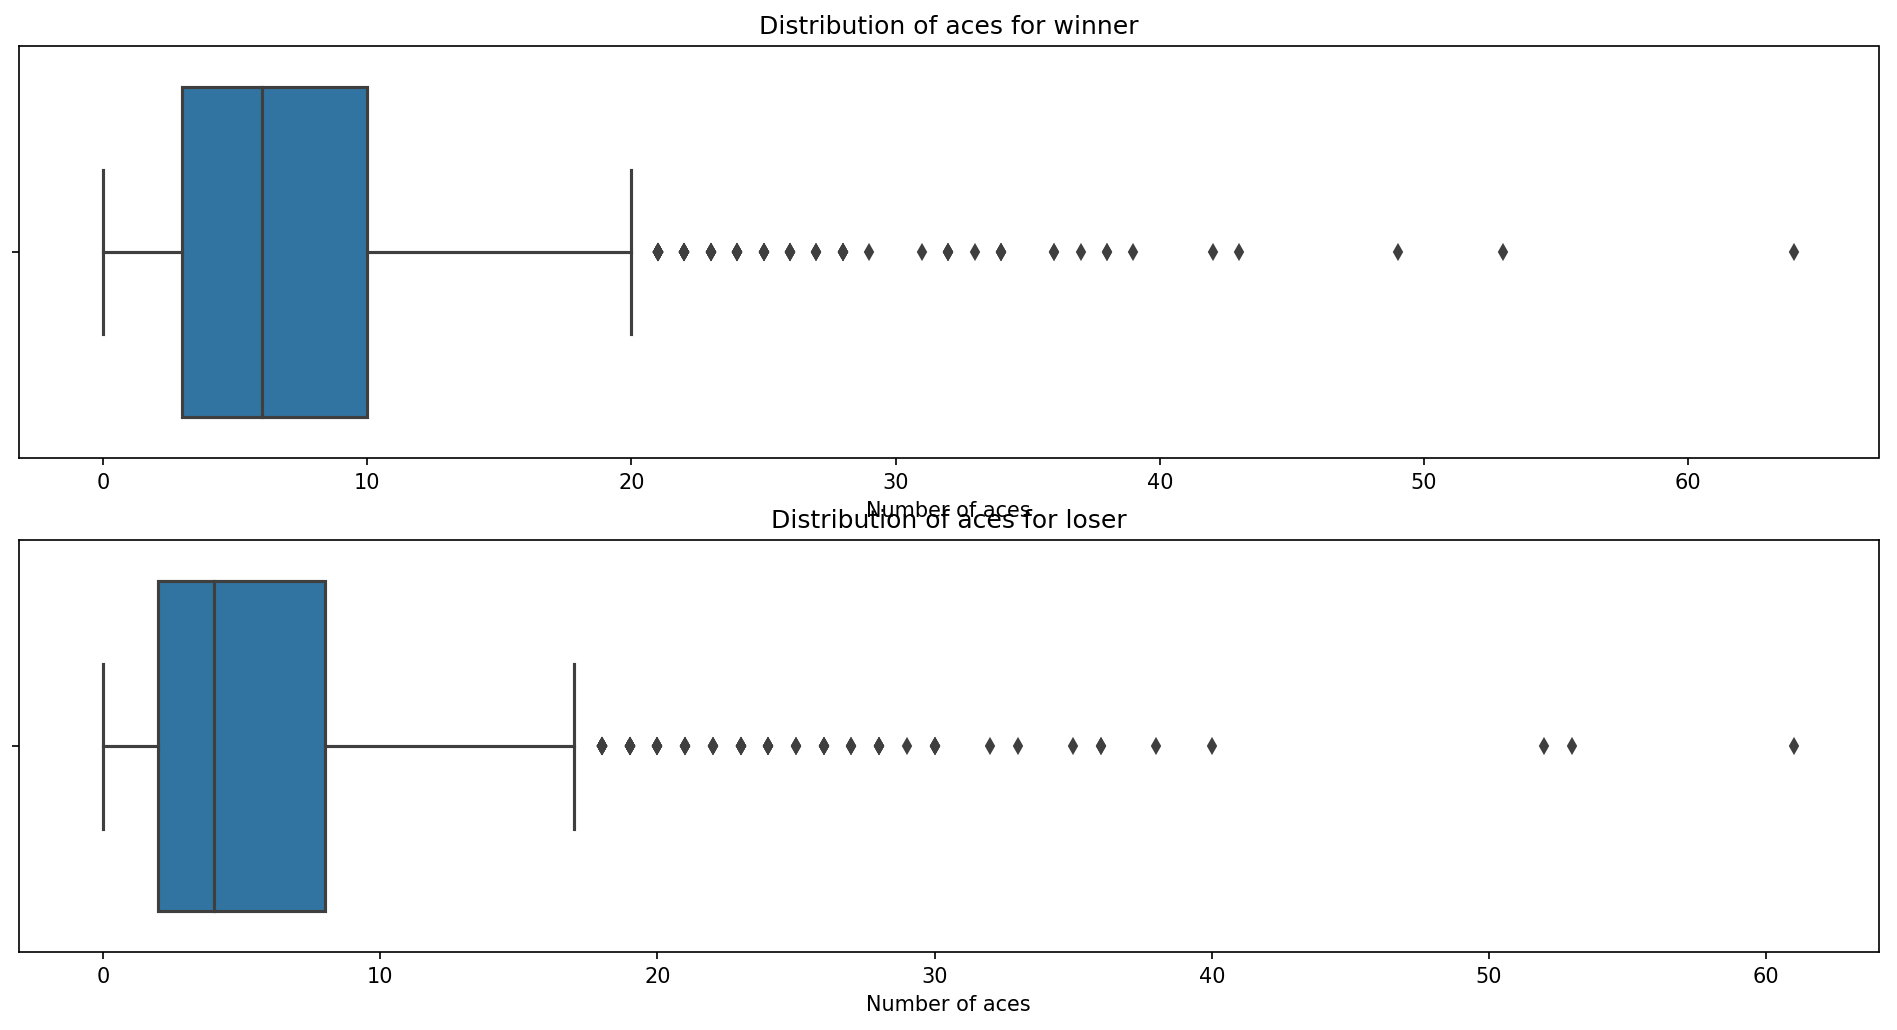

In [20]:
# Plot the distribution of aces
plot_dist('w_ace', 'l_ace', 'aces')

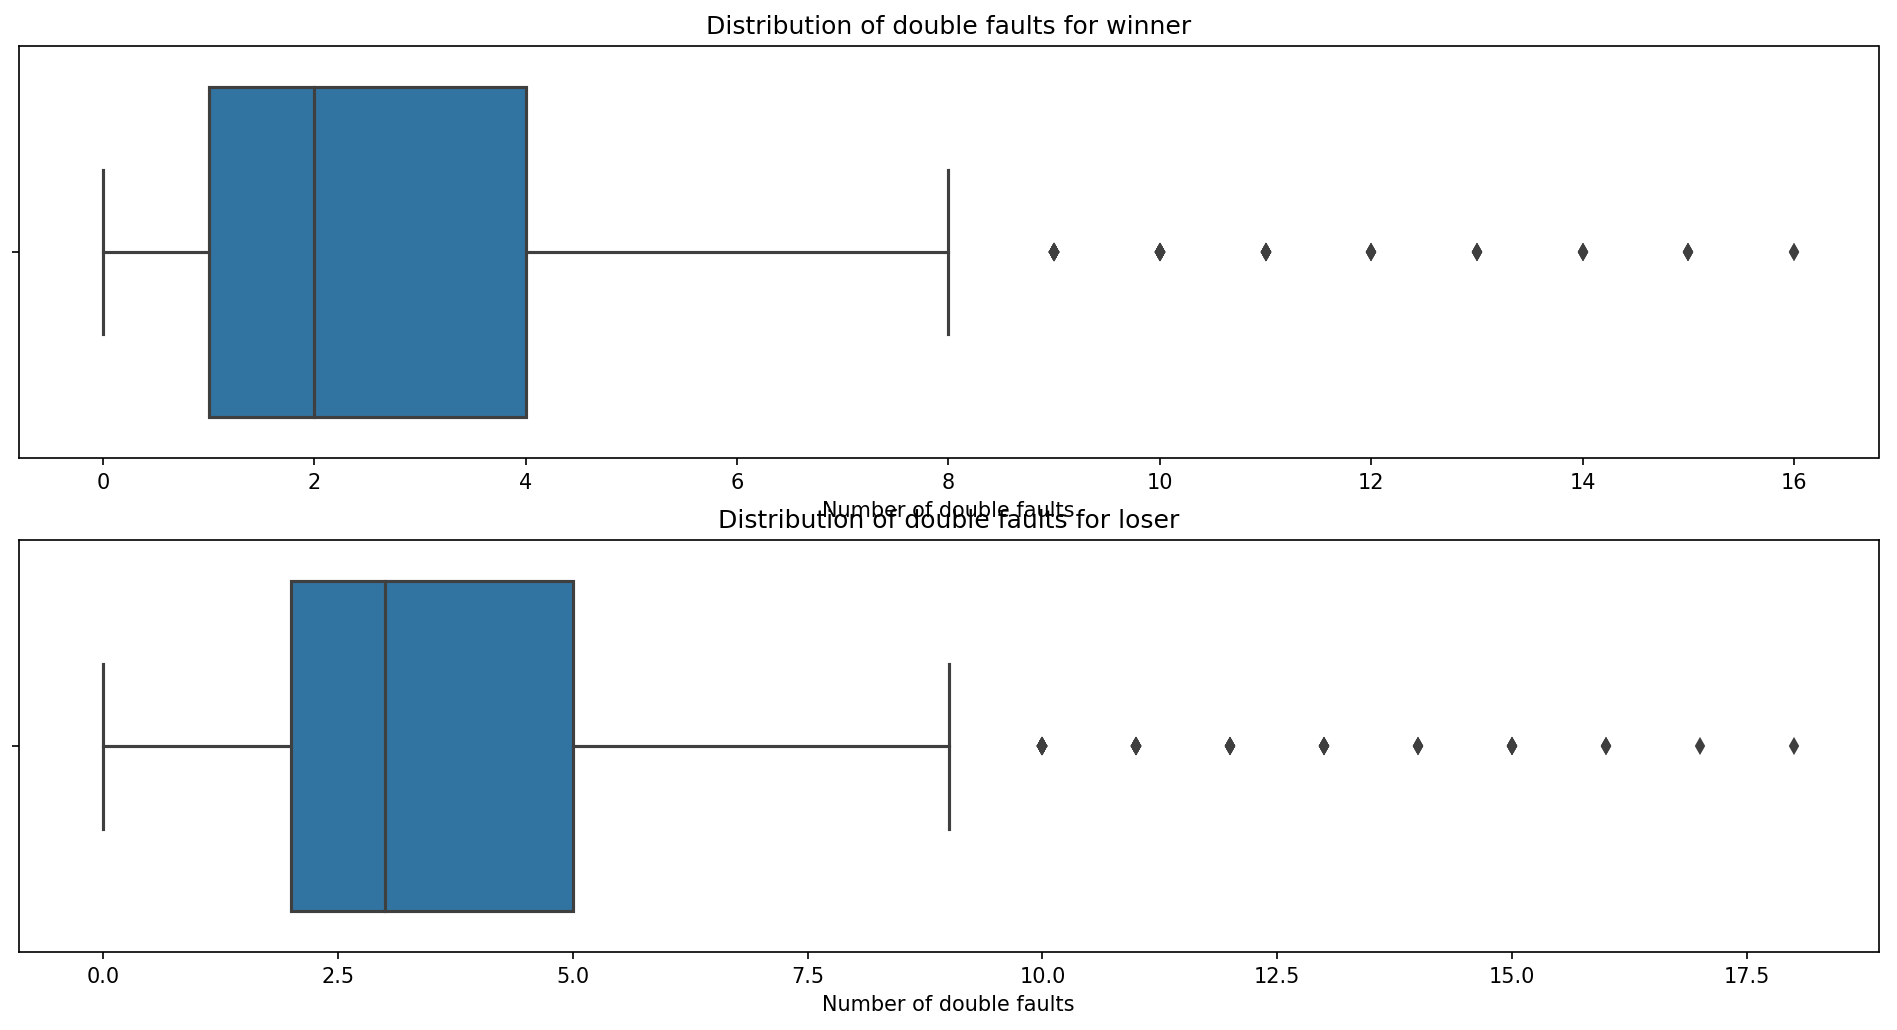

In [21]:
plot_dist('w_df', 'l_df', 'double faults')

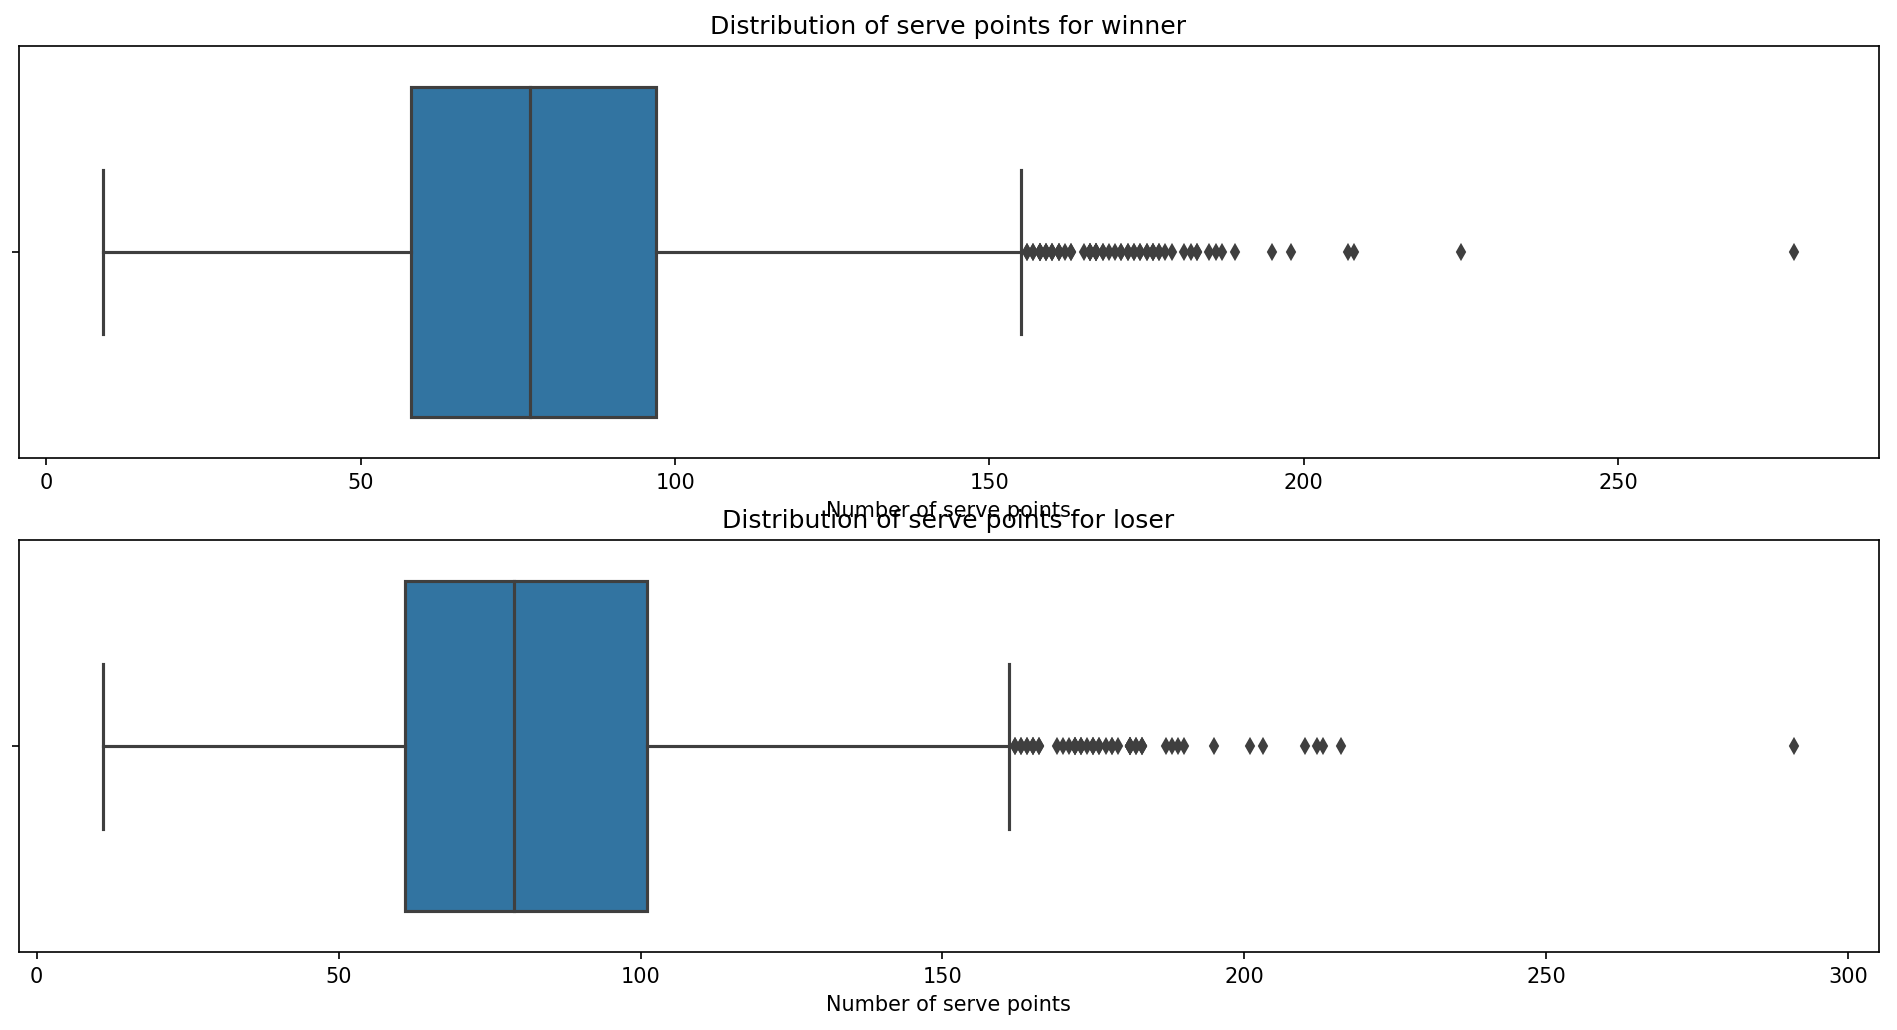

In [22]:
plot_dist('w_svpt', 'l_svpt', 'serve points')

Although the boxplot shows that each of these match stats have outliers, the 'outliers' aren't unreasonable in reality. Matches that last a longer time will inevitably have more aces, serve points, etc. Therefore, we can conclude that the data does not have outliers.

### Data in Weird Formats

The `tourney_date` values are stored as integers, which will make it hard to perform any chronological analysis. Let's change the values to `datetime` objects, which are easier to work with.

In [23]:
match_data_2018_df['tourney_date'] = pd.to_datetime(match_data_2018_df['tourney_date'].apply(lambda date: str(date)))

# Writing the Data to a File

In order to keep each notebook at a decent length, I will write the data to a file to be read into other notebooks. Since we are ready to begin the feature engineering process, I will split the data into a training set and a test set now.

In [25]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(match_data_2018_df, test_size=0.1)

In [26]:
data_file = Path('./data', 'cleaned_data.hdf')
train_df.to_hdf(data_file, 'train')
test_df.to_hdf(data_file, 'test')

/Users/raguvirkunani/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['tourney_id', 'tourney_name', 'surface', 'tourney_level', 'winner_name', 'winner_hand', 'winner_ioc', 'loser_name', 'loser_hand', 'loser_ioc', 'score', 'round']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
